# Werner Telomere Shortening and Distributions

https://elifesciences.org/articles/08687#s3

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.optimize import curve_fit
import math
import pandas as pd
import os

In [4]:
## average telomere length of a cell shortens by a constant factor during each division
## this underestimates number of senescent cells once telomeres become critically short
## telomere shortening can only persist if they occur on stem cell population
## uses telomere lengths in mature cells as proxy for dist. of TL in SCs

Asymmetric division - 1 HSc -> 1 HSc' + 1 progenitor (leaving Sc pool)

    1 HSc' keeps HSc properties, enters state i + 1, and telomeres shorten by delta.c
    
Symmetric division  - 1 HSc -> 1 HSc' + 1 HSc'

    Both keep HSc properties, enter state i + 1, telomeres shorten by delta.c

###### List of Parameters

1 + c = accessible telomere states of stem cells

i = a state, with cells of equal average TL

NO = number of cells in state 0

p = probability of symmetric division

1 - p = probability of asymmetric division

c = initial length

r = proliferation rate of cell

In [18]:
# get GS data and extract what we need
df = pd.read_csv('../Data/sheets/Generation_Scotland.csv', index_col=0)

age_DNAmTL = df[["age", "DNAmTL"]]
x_values = age_DNAmTL.age
y_values = age_DNAmTL.DNAmTL

## Expected Telomere Length

#### Asymmetric Division
Expected Telomere Length at time T = (c * NO - delta.c * r * t) / NO

In [17]:
# we setup the equation
def exp_asy(t, c, NO, delta, r):
    y = (c*NO-delta*r*t)/NO
    return y

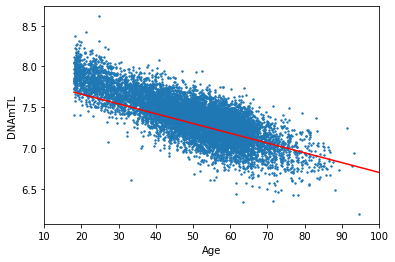

In [45]:
#set up parameters (to play with)

t = np.linspace (18, 100, 1000)
c = 7.9
NO = 10
delta = 0.1
r = 1.2

#plotting scatter with model on top

plt.scatter(x_values, y_values, s = 2)
plt.plot(t, exp_asy(t, c, NO, delta , r), color = 'red')


plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

#plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

#### Symmetric division

In [105]:
# we setup the equation
def exp_sym(t, c, delta, p, r, NO):
    
    y = c - delta * ((1+p)/p)*np.log(r*p/NO*t+1)
    
    return y

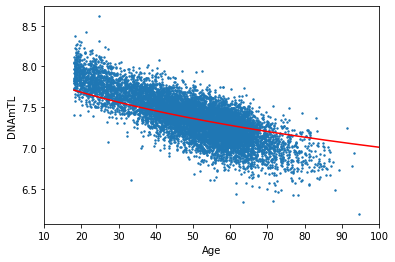

In [149]:
#set up parameters (to play with)
t = np.linspace (18, 100, 1000)
c = 8
delta = 0.06
p = 0.08
r = 30
NO = 100


#plotting scatter with model on top
plt.scatter(x_values, y_values, s = 2)
plt.plot(t, exp_sym(t, c, delta, p, r, NO,), color = 'red')


plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

#plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

## Curve Fitting

In [ ]:
# to find initial CO specific to our data

#function to find LO, as an average of y values corresponding to head x values 
def find_LO(df):
    sorted_age_DNAmTL = df.sort_values('age')
    temp = sorted_age_DNAmTL.head(300)
    LO = temp['DNAmTL'].median()
    return LO


#get LO for dataset
LO = find_LO(age_DNAmTL)
LO

#### Asymmetric Divison

In [151]:
# optimise parameters
pars, testcov = curve_fit(exp_asy, x_values, y_values)
print(pars)
print(testcov)

[ 8.16432983 -0.03483601  0.02111978 -0.02624146]
[[ 5.02110981e-05  4.95916924e+00 -1.82351374e+00  1.46994164e+00]
 [ 4.95918915e+00  3.47697649e+06 -1.27889941e+06  1.03011540e+06]
 [-1.83395225e+00 -1.28621290e+06  6.81757043e+05 -1.21798121e+05]
 [ 1.45698673e+00  1.02102834e+06 -1.16288976e+05  6.24636038e+05]]


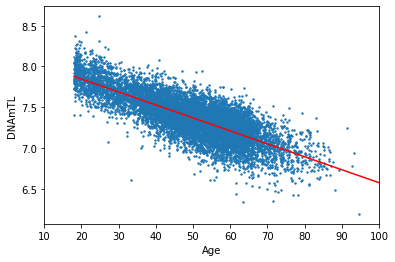

In [152]:
#plotting scatter with model on top
plt.scatter(x_values, y_values, s = 2)
plt.plot(t, exp_asy(t, *pars), color = 'red')


plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

#plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

#### Asymmetric Division

In [154]:
# optimise parameters
pars, testcov = curve_fit(exp_sym, x_values, y_values)
print(pars)
print(testcov)

[8.30680632 0.60102629 0.36155982 0.07599567 2.64022823]
[[ 6.10775713e-04  1.00009265e+01  8.19302541e+00 -1.98879977e+00
  -9.27854493e+00]
 [ 9.96205288e+00  5.54380407e+08  4.54078907e+08 -1.04652873e+08
  -3.19999105e+08]
 [ 8.16118501e+00  4.54078907e+08  3.71924497e+08 -8.57185089e+07
  -2.62103105e+08]
 [-2.03057699e+00 -1.07386175e+08 -8.79572872e+07  2.73698079e+07
   3.08584187e+08]
 [-1.09624708e+01 -4.14959007e+08 -3.39882349e+08  3.24932478e+08
   8.80681492e+09]]


C:\Users\gabri\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


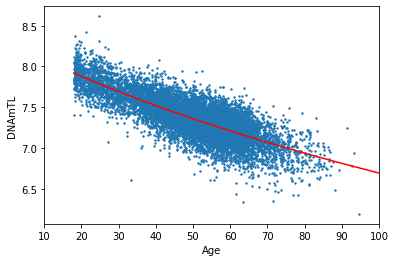

In [155]:
#plotting scatter with model on top
plt.scatter(x_values, y_values, s = 2)
plt.plot(t, exp_sym(t, *pars), color = 'red')


plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

#plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()